# 1) Explications

Il fallait choisir un des sujets dans la liste faire une analyse des données associées sous forme d'un document computationnel. 

J'ai choisi le Sujet 5 : Analyse des dialogues dans l'Avare de Molière.
Pour ce sujet, il fallait:
- Classer les personnages selon la quantité de parole grâce à une analyse syntaxique du texte (scènes / répliques / mots). En particulier, quel est celui qui parle le plus ? Quel est celui qui ne parle pas du tout ?
- Réaliser un graphique qui montrera le nombre de mots que chaque acteur prononce dans chaque scène en s'inspirant de l'étude de l'Avare de Molière réalisée par l'OBVIL.

J'ai d'abord importé le texte et séparé toutes les scènes et toutes les lignes. 

Pour savoir combien de fois un personnage prenait la parole, il fallait chercher combien de fois son nom apparaissait seul sur une ligne (annonce du nom du personnage avant qu'il parle), sinon ça marche pas car ils peuvent dire le nom de quelqu'un sans que cette personne ne parle.

J'ai noté ce nombre (le nombre de fois où le personnage intervient dans la scène) pour chaque scène et pour chaque personnage dans des tableaux.

Comme il y a 32 scènes et 13 personnages (14 mais yen a un qui parle pas), cela donne quelque chose comme ça:


| | HARPAGON | VALÈRE | ÉLISE | ... 13 |
| :---------: |:---------:| :-----:| :-----:|:-----:|
| Scène 1 | 2 | 0 | 8 | 44 |
| Scène 2 | 32 | 6 | 0 | 2 |
| Scène 3 | 0 | 6 | 5 | 1 |
| ... 32 | ... | ... | ... | ... |

Les 0 signifient que les personnages ne parlent pas de toute la scène. 

Maintenant on doit tracer les diagrammes pour chaque scène: j'ai choisi de faire 32 graphiques en camembert.


Enfin, j'ai fait un gros diagramme pour montrer la proportion des interventions des personnages dans la pièce entière. 


# 2) Code

In [188]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import isoweek
import requests
import urllib.request
import io

## 2.1) On télécharge la pièce

In [189]:
# L'URL du fichier texte
url = "https://dramacode.github.io/markdown/moliere_avare.txt"

# Ouvre l'URL et lit le contenu en tant que fichier texte
with urllib.request.urlopen(url) as response:
    # Lit les données depuis l'URL
    data = response.read()

texte = io.StringIO(data.decode('utf-8')).read()
#print(texte)

## 2.2) Graphiques camembert

In [190]:
#mot_a_chercher = "HARPAGON."
#mot_a_chercher = "VALÈRE."
#mot_a_chercher = "ÉLISE."
#mot_a_chercher = "CLÉANTE."
#mot_a_chercher = "LA FLÈCHE."
#mot_a_chercher = "MARIANE."
#mot_a_chercher = "ANSELME."
#mot_a_chercher = "FROSINE."
#mot_a_chercher = "MAÎTRE SIMON."
#mot_a_chercher = "MAÎTRE JACQUES."
#mot_a_chercher = "BRINDAVOINE."
#mot_a_chercher = "LA MERLUCHE."
#mot_a_chercher = "LE COMMISSAIRE."

# Compteur pour stocker le nombre d'occurrences du mot
compteurs_occurrences = []

# Ouvre l'URL et lit le contenu en tant que fichier texte
with urllib.request.urlopen(url) as response:
    # Lit les données depuis l'URL et divise le texte en parties par les lignes commençant par '###'
    parties_texte = response.read().decode('utf-8').split('###')[1:]

# Parcourt chaque partie du texte
for partie in parties_texte:
    lignes = partie.strip().splitlines() # Divise la partie en lignes
    compteur_occurrences = 0 # Compteur d'occurrences pour cette partie
    
    # Parcourt chaque ligne de la partie et compte les occurrences du mot
    for ligne in lignes:
        # Vérifie si le mot apparaît seul sur la ligne
        if ligne.strip() == mot_a_chercher:
            compteur_occurrences += 1
    
    # Ajoute le compteur d'occurrences de cette partie à la liste des compteurs
    compteurs_occurrences.append(compteur_occurrences)

# Pour afficher le nombre d'occurrences du mot dans chaque partie du texte:
#for i, occurrences in enumerate(compteurs_occurrences, start=1):
    #print(f"Le mot '{mot_a_chercher}' apparaît {occurrences} fois dans la partie {i} du texte.")
    

In [191]:
# Les 32 Tableaux (oui j'ai fait ça à la main, j'avais la flemme de réfléchir)

personnages=["HARPAGON", "VALÈRE", "ÉLISE", "CLÉANTE", "LA FLÈCHE", "MARIANE", "ANSELME", "FROSINE", "MAÎTRE SIMON", "MAÎTRE JACQUES", "BRINDAVOINE", "LA MERLUCHE", "LE COMMISSAIRE"]
partie1=[0,8,8,0,0,0,0,0,0,0,0,0,0]
partie2=[0,0,9,10,0,0,0,0,0,0,0,0,0]
partie3=[34,0,0,0,32,0,0,0,0,0,0,0,0]
partie4=[53,0,23,29,0,0,0,0,0,0,0,0,0]
partie5=[20,22,4,0,0,0,0,0,0,0,0,0,0]
partie6=[0,0,0,21,20,0,0,0,0,0,0,0,0]
partie7=[9,0,0,6,1,0,0,0,5,0,0,0,0]
partie8=[1,0,0,0,0,0,0,1,0,0,0,0,0]
partie9=[0,0,0,0,6,0,0,5,0,0,0,0,0]
partie10=[35,0,0,0,0,0,0,35,0,0,0,0,0]
partie11=[34,11,1,3,0,0,0,0,0,27,1,2,0]
partie12=[0,11,0,0,0,0,0,0,0,11,0,0,0]
partie13=[0,0,0,0,0,0,0,2,0,1,0,0,0]
partie14=[0,0,0,0,0,0,0,5,0,0,0,0,0]
partie15=[2,0,0,0,0,0,0,1,0,0,0,0,0]
partie16=[6,0,1,0,0,1,0,1,0,0,0,0,0]
partie17=[9,0,0,20,0,10,0,5,0,0,0,0,0]
partie18=[2,0,0,0,0,0,0,0,0,0,2,0,0]
partie19=[6,2,0,2,0,0,0,0,0,0,0,3,0]
partie20=[0,0,2,10,0,6,0,6,0,0,0,0,0]
partie21=[3,0,1,1,0,0,0,0,0,0,0,0,0]
partie22=[23,0,0,22,0,0,0,0,0,0,0,0,0]
partie23=[8,0,0,8,0,0,0,0,0,17,0,0,0]
partie24=[18,0,0,19,0,0,0,0,0,0,0,0,0]
partie25=[0,0,0,5,5,0,0,0,0,0,0,0,0]
partie26=[1,0,0,0,0,0,0,0,0,0,0,0,0]
partie27=[6,0,0,0,0,0,0,0,0,0,0,0,7]
partie28=[19,0,0,0,0,0,0,0,0,22,0,0,8]
partie29=[30,30,0,0,0,0,0,0,0,0,0,0,0]
partie30=[4,1,1,0,0,0,0,1,0,0,0,0,0]
partie31=[11,14,0,0,0,3,14,0,0,0,0,0,0]
partie32=[10,0,0,4,0,1,6,0,0,0,0,0,2]


<IPython.core.display.Javascript object>


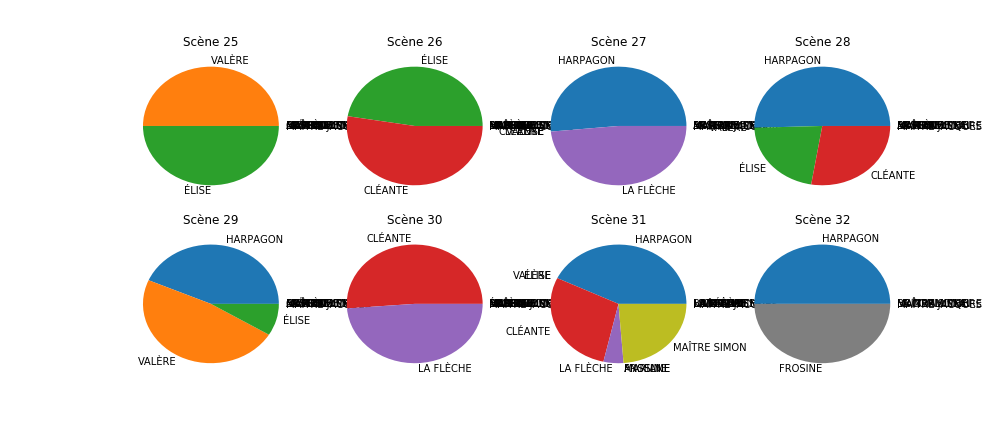

<IPython.core.display.Javascript object>


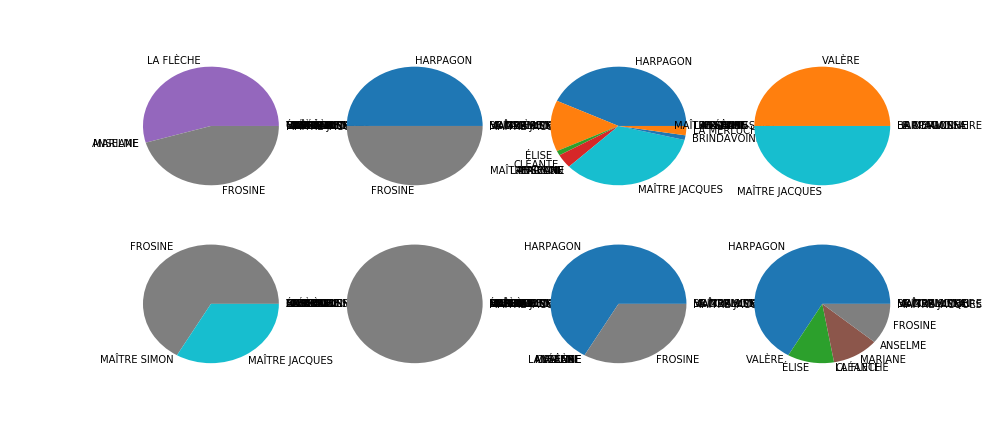

<IPython.core.display.Javascript object>


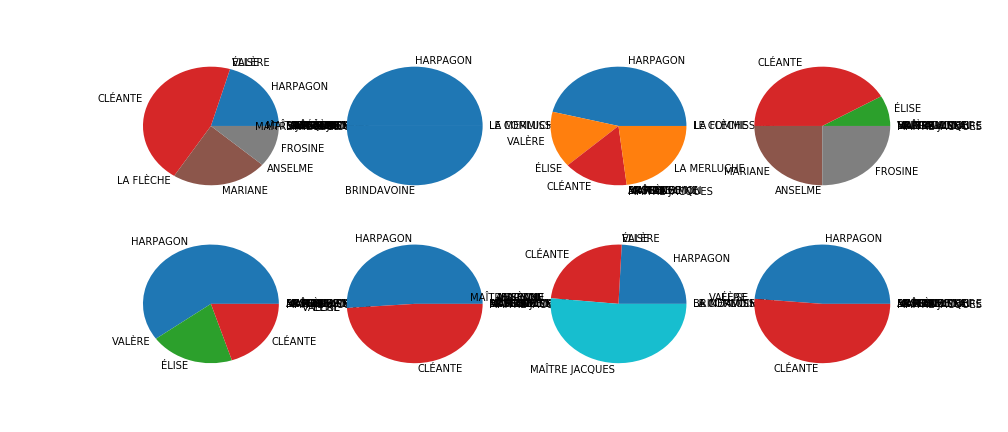

<IPython.core.display.Javascript object>


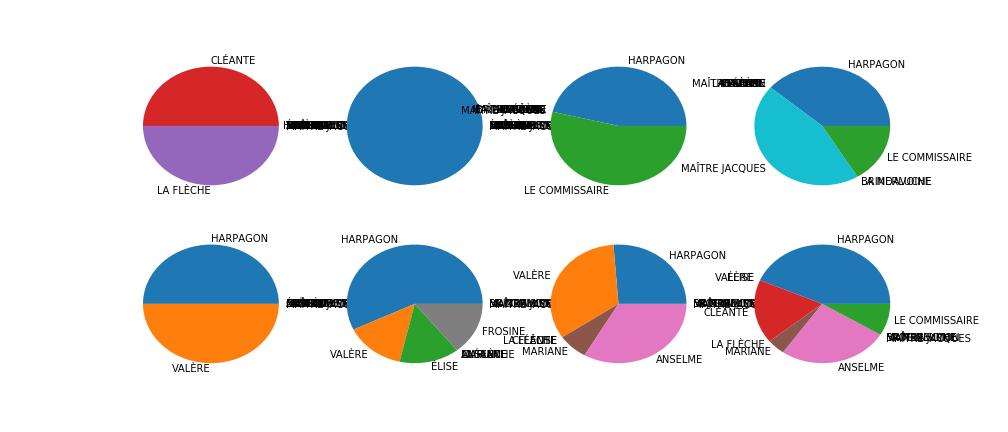

In [195]:
# Maintenant on plot tout ça. C'est pas super beau mais ça fait le taff, j'ai déjà pas mal galéré.

%matplotlib notebook
fig, axs = plt.subplots(2, 4, figsize=(14,6))

for i in range(2):
    for j in range(4):
        axs[i, j].set_title(f'Scène {i * 4 + j + 1}')

axs[0, 0].pie(partie1, labels=personnages)
axs[0, 1].pie(partie2, labels=personnages)
axs[0, 2].pie(partie3, labels=personnages)
axs[0, 3].pie(partie4, labels=personnages)
axs[1, 0].pie(partie5, labels=personnages)
axs[1, 1].pie(partie6, labels=personnages)
axs[1, 2].pie(partie7, labels=personnages)
axs[1, 3].pie(partie8, labels=personnages)


fig, axs2 = plt.subplots(2, 4, figsize=(14,6))
for i in range(2):
    for j in range(4):
        axs[i, j].set_title(f'Scène {8+ i * 4 + j + 1}')

axs2[0, 0].pie(partie9, labels=personnages)
axs2[0, 1].pie(partie10, labels=personnages)
axs2[0, 2].pie(partie11, labels=personnages)
axs2[0, 3].pie(partie12, labels=personnages)
axs2[1, 0].pie(partie13, labels=personnages)
axs2[1, 1].pie(partie14, labels=personnages)
axs2[1, 2].pie(partie15, labels=personnages)
axs2[1, 3].pie(partie16, labels=personnages)


fig, axs3 = plt.subplots(2, 4, figsize=(14,6))
for i in range(2):
    for j in range(4):
        axs[i, j].set_title(f'Scène {16+ i * 4 + j + 1}')

axs3[0, 0].pie(partie17, labels=personnages)
axs3[0, 1].pie(partie18, labels=personnages)
axs3[0, 2].pie(partie19, labels=personnages)
axs3[0, 3].pie(partie20, labels=personnages)
axs3[1, 0].pie(partie21, labels=personnages)
axs3[1, 1].pie(partie22, labels=personnages)
axs3[1, 2].pie(partie23, labels=personnages)
axs3[1, 3].pie(partie24, labels=personnages)


fig, axs4 = plt.subplots(2, 4, figsize=(14,6))
for i in range(2):
    for j in range(4):
        axs[i, j].set_title(f'Scène {24+ i * 4 + j + 1}')

axs4[0, 0].pie(partie25, labels=personnages)
axs4[0, 1].pie(partie26, labels=personnages)
axs4[0, 2].pie(partie27, labels=personnages)
axs4[0, 3].pie(partie28, labels=personnages)
axs4[1, 0].pie(partie29, labels=personnages)
axs4[1, 1].pie(partie30, labels=personnages)
axs4[1, 2].pie(partie31, labels=personnages)
axs4[1, 3].pie(partie32, labels=personnages)
plt.show()

## 2.3) Proportions de parole

In [193]:
# L'URL du fichier texte
url = "https://dramacode.github.io/markdown/moliere_avare.txt"

mot_a_chercher = "HARPAGON."
#mot_a_chercher = "VALÈRE."
#mot_a_chercher = "ÉLISE."
#mot_a_chercher = "CLÉANTE."
#mot_a_chercher = "LA FLÈCHE."
#mot_a_chercher = "MARIANE."
#mot_a_chercher = "ANSELME."
#mot_a_chercher = "FROSINE."
#mot_a_chercher = "MAÎTRE SIMON."
#mot_a_chercher = "MAÎTRE JACQUES."
#mot_a_chercher = "BRINDAVOINE."
#mot_a_chercher = "LA MERLUCHE."
#mot_a_chercher = "LE COMMISSAIRE."

# Fonction pour récupérer le contenu du fichier texte à partir d'une URL
def get_text_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

# Récupère le contenu du fichier texte à partir de l'URL
text_content = get_text_from_url(url)


# Vérifie combien de fois le mot apparaît seul sur une ligne dans le texte (en ignorant la casse)
if text_content:
    lignes = text_content.lower().splitlines()
    occurrences = sum(1 for ligne in lignes if ligne.strip() == mot_a_chercher.lower())
    print(f"Le mot '{mot_a_chercher}' apparaît seul sur une ligne {occurrences} fois dans le texte.")
else:
    print("Impossible de récupérer le contenu du fichier texte depuis l'URL.")


Le mot 'HARPAGON.' apparaît seul sur une ligne 344 fois dans le texte.


<IPython.core.display.Javascript object>


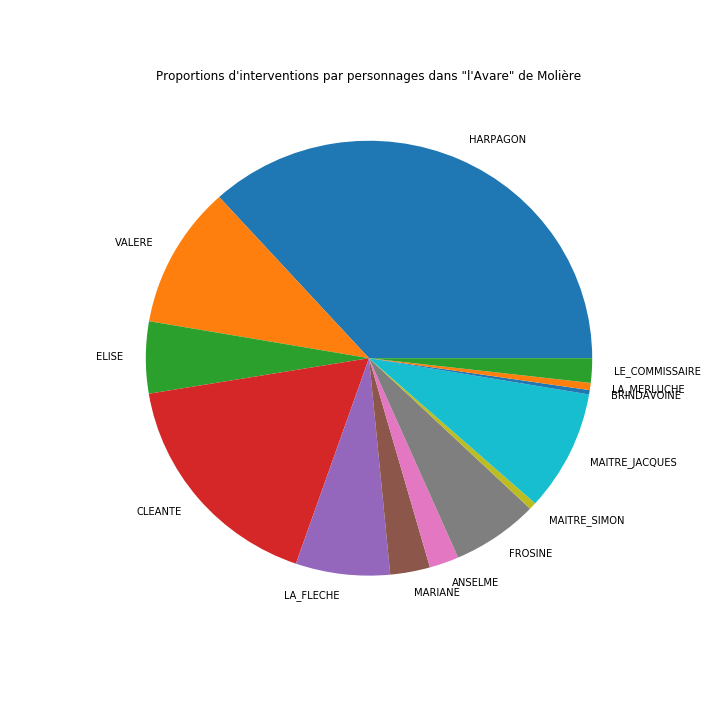

In [194]:
#Résultats: 

HARPAGON=344
VALERE=99
ELISE=50
CLEANTE=160
LA_FLECHE=64
MARIANE=27
ANSELME=20
FROSINE=59
MAITRE_SIMON=5
MAITRE_JACQUES=84
BRINDAVOINE=3
LA_MERLUCHE=5
LE_COMMISSAIRE=17

#On plot :
Donnees=[344, 99, 50, 160, 64, 27, 20, 59, 5, 84, 3, 5, 17]
Noms=["HARPAGON", "VALERE", "ELISE", "CLEANTE", "LA_FLECHE", "MARIANE", "ANSELME", "FROSINE", "MAITRE_SIMON", "MAITRE_JACQUES", "BRINDAVOINE", "LA_MERLUCHE", "LE_COMMISSAIRE"]

plt.figure(figsize=(10,10))
plt.title("Proportions d'interventions par personnages dans \"l'Avare\" de Molière")
plt.pie(Donnees, labels=Noms)
plt.show()